# 1. Setting up

Import all required modules

In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

# Set a fixed random seed to standardize results
np.random.seed(2) # 579

Read in the weather data and view it. For additional info on the weather dataset we're using, see [this](https://corgis-edu.github.io/corgis/csv/weather/).

In [6]:
# TODO: read in weather data and view (hint: only need to view first 5 datapoints)
weather = pd.read_csv("weather.csv")
weather.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


# 2. Pre-processing

We want to predict the max temperature for a particular week. **What input columns should we use?** (There are multiple reasonable answers.)

In [7]:
input_cols = [
    "Data.Precipitation",
    "Data.Temperature.Avg Temp",
    "Data.Temperature.Min Temp",
    "Data.Wind.Speed"] #TODO: choose the input columns
output_col = "Data.Temperature.Max Temp"

Split the weather data into a training and test set and then store the input and target data seperately for each set. Use [train/test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn.

In [8]:
# TODO: split into training and testing sets
train, test = train_test_split(weather, test_size=0.2)

# TODO: split data sets into input and target variables
train_X = train[input_cols]
train_y = train[output_col]

test_X = test[input_cols]
test_y = test[output_col]

Check the shape of each set to make sure they make sense!

In [9]:
print("train input data shape:", train_X.shape)
print("train target data shape:", train_y.shape)
print()
print("test input data shape:", test_X.shape)
print("test target data shape:", test_y.shape)

train input data shape: (13394, 4)
train target data shape: (13394,)

test input data shape: (3349, 4)
test target data shape: (3349,)


# 3. Linear regression

Create a simple [least squares linear Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

In [10]:
####TODO: Define a new linear regression model
simple_linear_model = LinearRegression()

Train the model using the training data and output the training error. To do so, define a function rmse(mode, X, y) that calculates the RMSE error for a given model, input, and target data.

In [11]:
def rmse(model, X, y):
    predictions = model.predict(X)
    return mean_squared_error(predictions, y, squared=False)

Now, let's fit the data to the linear model and then find the error on the training values

In [12]:
####TODO: Fit simple linear model we just created to training data
simple_linear_model.fit(train_X, train_y)
####

#Now taking the Root mean squared error
rmse(simple_linear_model, train_X, train_y)

/Users/verisimilitude/Documents/GitHub/CSE416/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(1.4813835714199366)

Now, let's take a look at what our y-intercept and weights are like in the model we have just created. 

In [13]:
print(simple_linear_model.intercept_) 
print(simple_linear_model.coef_)

0.4897145010703099
[-0.08620339  1.91668008 -0.91588353 -0.01529933]


**Concept check:**  What does this model suggest about useful features? Can you think of a function of important features which is an approximation of what the model is doing?

# 4. Bias - Variance and overfitting

Let's take a look at the train and test errors we get on the simple model we created. 

In [14]:
print("Train Error: ", rmse( simple_linear_model, train_X, train_y))
print("Test Error: ", rmse(simple_linear_model, test_X, test_y))

Train Error:  1.4813835714199366
Test Error:  1.095055790474761


/Users/verisimilitude/Documents/GitHub/CSE416/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/verisimilitude/Documents/GitHub/CSE416/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


As you can see, the linear model is doing quite well on our data.

Now, let's try to train a more complex model using sklearn's PolynomialFeatures which would account for all polynomial combinations of given features to a provided degree. 

This time, we split the training data into further training set and a **validation set**. Validation is a useful method in checking your model's robustness before actually applying it on test data. If your model is overfitting on the training data, validation set will make us aware of that. We will not be checking the new model on test data in this, but you can do it as an exercise.

/Users/verisimilitude/Documents/GitHub/CSE416/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/verisimilitude/Documents/GitHub/CSE416/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/verisimilitude/Documents/GitHub/CSE416/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/verisimilitude/Documents/GitHub/CSE416/.venv/lib/python3.12/site-packages/sklearn/metrics/

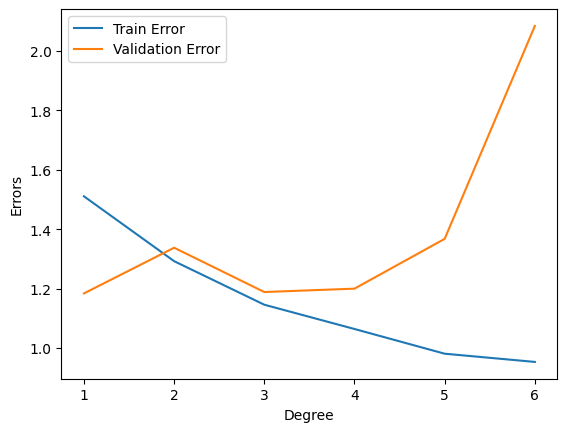

In [15]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.1, random_state=1)

degrees = [1,2,3,4,5,6]
train_errors = []
val_errors = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree) # accont for features of higher degree
    poly_train_X = poly_features.fit_transform(train_X)

    poly_linear_model = LinearRegression()
    poly_linear_model.fit(poly_train_X, train_y)

    train_errors.append(rmse(poly_linear_model, poly_train_X, train_y))
    val_errors.append(rmse(poly_linear_model, poly_features.transform(val_X) , val_y))

# validation vs train error 
plt.plot(degrees, train_errors, label = "Train Error")
plt.plot(degrees, val_errors, label = "Validation Error")
plt.xlabel("Degree")
plt.ylabel("Errors")
plt.legend()
plt.show()


**Concept check:** How do the Validation error and Train error compare? Do you see any alarming difference? What might be causing this?

Now, uncomment the `np.random.seed()` line at the top of the notebook, just below the import statements. Re-run the entire notebook again (use 'Run All' button on top left corner). What do you see? Compare with your neighbors. 

Introducing np.random.seed() will standardize all the train test splits so you get the same result across different runs. As you can see above after this procedure, the validation error is significantly higher than the train error beginning degree 4, because our model becomes **overfitting** to the dataset provided. 

**conceptual Question:** Does the linear model have high bias? Does it have high variance?

Higher variance is generally co-related with overfitting; high-bias is with underfiting and higher training loss. A complex model which has high complexity to minimize the training error has a tendency to overfit to the training dataset and will might do poorly with the testing dataset.



---

